In [1]:
from agent.Q_Learning_Agent import Q_Learning_Agent
import networkx as nx
import pandas as pd
import numpy as np
from networks.network_utils import graph_generator, graph_utils
import matplotlib.pyplot as plt
%matplotlib inline

### グラフの定義

In [2]:
G = nx.read_gpickle("./networks/onedim_regular.gpickle")

/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/matplotlib/rcsetup.py:152: U

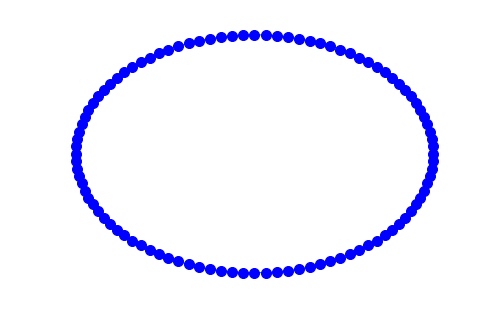

In [5]:
nx.draw_circular(G, node_color='b', edge_color='g', node_size=100)

In [2]:
cG = nx.read_gpickle("../results/basic/q/complete/prisoners_dilemma_g.gpickle")
rG = nx.read_gpickle("../results/basic/q/random/prisoners_dilemma_g.gpickle")
g2G = nx.read_gpickle("../results/basic/q/grid2d/prisoners_dilemma_g.gpickle")
wG = nx.read_gpickle("../results/basic/q/watts_strogatz/prisoners_dilemma_g.gpickle")
baG = nx.read_gpickle("../results/basic/q/barabasi_albert/prisoners_dilemma_g.gpickle")
pcG = nx.read_gpickle("../results/basic/q/powerlaw_cluster/prisoners_dilemma_g.gpickle")
icG = nx.read_gpickle("./networks/inner_dence_clustered.gpickle")
mcG = nx.read_gpickle("./networks/multiple_clustered.gpickle")

nameG = ["complete", "random", "grid 2d", "watts strogatz",  "barabasi albert", "powerlaw cluster", "inner_dence_clustered"]
allG = [cG, rG, g2G, wG, baG, pcG, icG, mcG]

In [3]:
cR = pd.read_csv("../results/basic/q/complete/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
rR = pd.read_csv("../results/basic/q/random/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
g2R = pd.read_csv("../results/basic/q/grid2d/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
wR = pd.read_csv("../results/basic/q/watts_strogatz/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
baR = pd.read_csv("../results/basic/q/barabasi_albert/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
pcR = pd.read_csv("../results/basic/q/powerlaw_cluster/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
icR = pd.read_csv("../results/clustered/q/inner_dence_clustered/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]
mcR = pd.read_csv("../results/clustered/q/multiple_clustered/prisoners_dilemma_ave.csv", header=None).iloc[-1][0]

allR = [cR, rR, g2R, wR, baR, pcR, icR, mcR]

### 各指標を算出

#### ノード数，エッジ数

In [15]:
for n, G in zip(nameG, allG):
    print(n, ":", "\n\tnode -> ", len(G.nodes()), "edge -> ",len(G.edges()))

complete : 
	node ->  100 edge ->  4950
random : 
	node ->  100 edge ->  2500
grid 2d : 
	node ->  100 edge ->  180
watts strogatz : 
	node ->  100 edge ->  2500
barabasi albert : 
	node ->  100 edge ->  2100
powerlaw cluster : 
	node ->  100 edge ->  2432
inner_dence_clustered : 
	node ->  100 edge ->  972


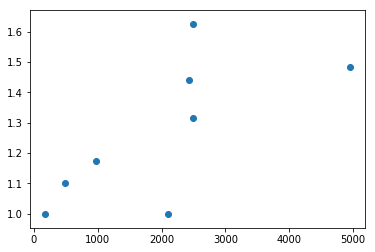

In [8]:
x = []
for G in allG:
    x.append(G.size())
plt.scatter(x, allR)
plt.savefig('edge_reward.png')

#### 平均経路長

In [12]:
for n, G in zip(nameG, allG):
    try:
        print(n, ":", graph_utils.average_shortest_path_length(G))
    except:
        print(n, ": Graph is not connected.")

complete : 1.0
random : 1.494949494949495
grid 2d : 6.666666666666667
watts strogatz : 1.494949494949495
barabasi albert : 1.5757575757575757
powerlaw cluster : 1.5086868686868686
inner_dence_clustered : 2.5054545454545454


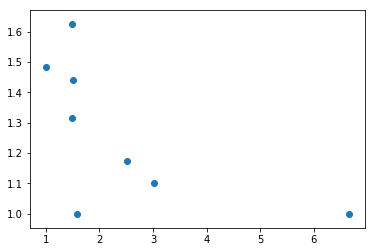

In [10]:
x = []
for G in allG:
    x.append(graph_utils.average_shortest_path_length(G))
plt.scatter(x, allR)
plt.savefig('shortest_path_reward.png')

#### クラスタリング係数

In [11]:
for n, G in zip(nameG, allG):
    print(n, ":", graph_utils.average_clustering(G))

complete : 1.0
random : 0.5031394188293861
grid 2d : 0.0
watts strogatz : 0.506698728903133
barabasi albert : 0.5339375824942478
powerlaw cluster : 0.6849337043198938
inner_dence_clustered : 0.9344582909843777


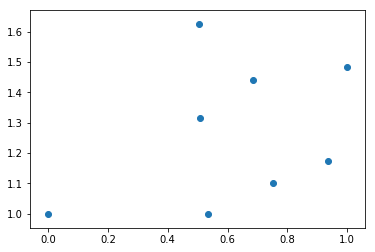

In [13]:
x = []
for G in allG:
    x.append(graph_utils.average_clustering(G))
plt.scatter(x, allR)
plt.savefig('clustring_coefficient.png')

#### 次数相関

In [9]:
for n, G in zip(nameG, allG):
    print(n, ":", graph_utils.assortativity(G))

complete : nan
random : -0.0234759793328
grid 2d : 0.570610687023
watts strogatz : 0.596475933851
barabasi albert : -0.0112655910372
powerlaw cluster : -0.191444979573
inner_dence_clustered : -0.360698080343
multiple_clustered : -0.10584916831
sparse_clustered : -0.0154605951177


/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


/Users/yamazakitakurou/.pyenv/versions/3.5.2/lib/python3.5/site-packages/scipy/stats/stats.py:3021: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


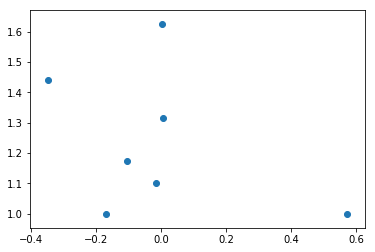

In [14]:
x = []
for G in allG:
    x.append(graph_utils.assortativity(G))
plt.scatter(x[1:], allR[1:])
plt.savefig('assottatibity.png')

#### 次数分布

In [10]:
for n, G in zip(nameG, allG):
    name = "_".join(n.split())
    graph_utils.plot_degree_histogram(G,"./fig/degree/"+name+".png")

In [11]:
for n, G in zip(nameG, allG):
    name = "_".join(n.split())
    graph_utils.plot_graph(G,"./fig/network/"+name+".png")

#### 次数中心性

In [4]:
pcG = nx.read_gpickle("../results/basic/q/powerlaw_cluster/prisoners_dilemma_g.gpickle")
pcR = pd.read_csv("../results/basic/q/powerlaw_cluster/prisoners_dilemma_action_table.csv").iloc[-1]

In [6]:
payoff = pd.DataFrame(np.array([[3, 0],[5, 1]]),index=list('cd'), columns=list('cd'))

In [7]:
x = []
hoge = nx.degree_centrality(pcG)
for i in range(len(pcR)):
    x.append(hoge[i])

In [5]:
y = []
for n in pcG.nodes():
    neighbors = pcG.neighbors(n)
    n_action = pcR[n]
    n_reward = 0
    for ne in neighbors:
        ne_action = pcR[ne]
        n_reward += payoff[ne_action][n_action]
    y.append(n_reward/len(neighbors))

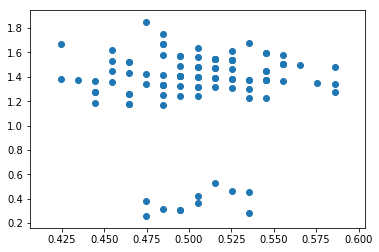

In [6]:
plt.scatter(x, y)
plt.savefig("degree_centrarity.png")

In [7]:
x = []
hoge = nx.betweenness_centrality(pcG)
for i in range(len(pcR)):
    x.append(hoge[i])

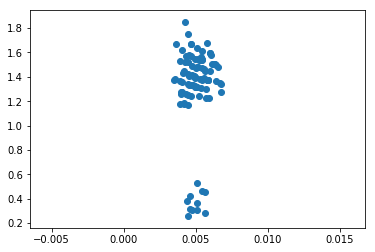

In [8]:
plt.scatter(x, y)
# plt.savefig("betweeness_centrarity.png")

In [9]:
x = []
hoge = nx.closeness_centrality(pcG)
for i in range(len(pcR)):
    x.append(hoge[i])

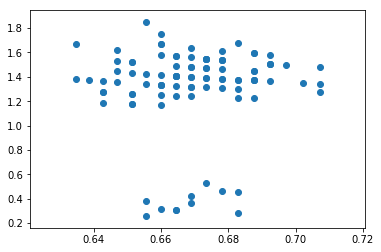

In [10]:
plt.scatter(x, y)
plt.savefig("closeness_centrarity.png")